In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('economic_index.csv')

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
#drop unnecessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace = True)

In [10]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

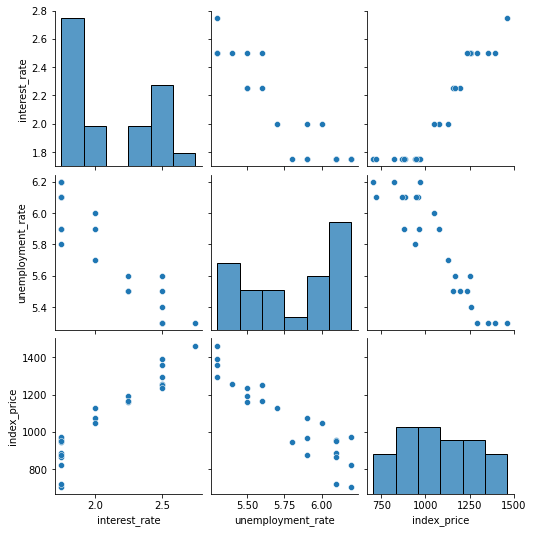

In [12]:
#visualisation
sns.pairplot(df)

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

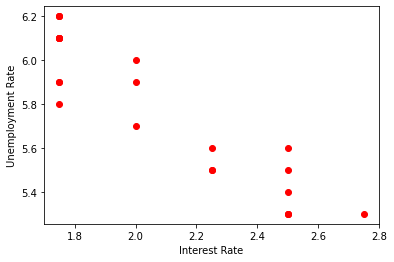

In [15]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [17]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [21]:
# train test split
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

C:\Users\kbmah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

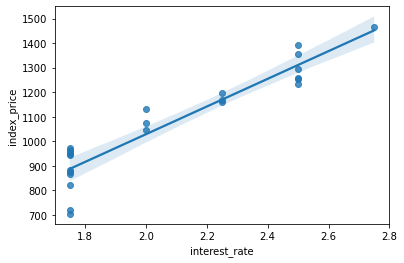

In [23]:
sns.regplot(df['interest_rate'],df['index_price'])

C:\Users\kbmah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

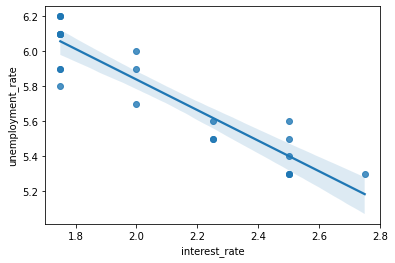

In [24]:
sns.regplot(df['interest_rate'],df['unemployment_rate'])

C:\Users\kbmah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='index_price', ylabel='unemployment_rate'>

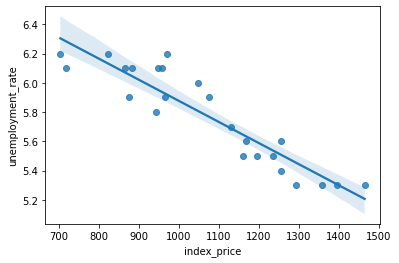

In [25]:
sns.regplot(df['index_price'],df['unemployment_rate'])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression=LinearRegression()

In [30]:
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [35]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [34]:
np.mean(validation_score)

-5914.828180162388

In [36]:
## prediction
y_pred = regression.predict(X_test)

In [37]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [38]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [40]:
from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [43]:
#display Adjusted r-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

### Assumptions

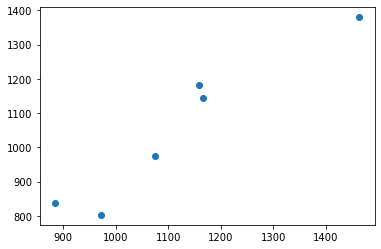

In [44]:
plt.scatter(y_test,y_pred)

In [45]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


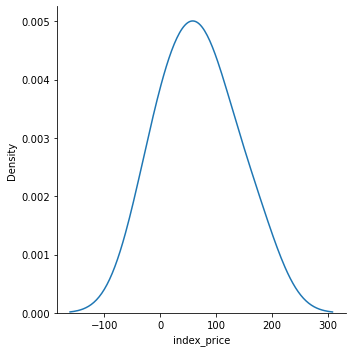

In [46]:
## plot this residuals
sns.displot(residuals,kind='kde')

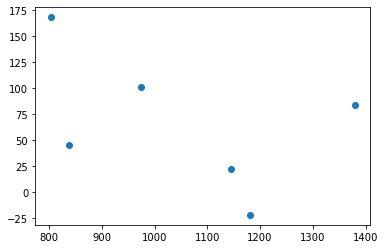

In [47]:
# scatter plot with respect to predictions and resiuals
plt.scatter(y_pred,residuals)

In [48]:
## OLS Linear Regression
import statsmodels.api as sm

In [49]:
model = sm.OLS(y_train,X_train).fit()

In [50]:
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [51]:
model.summary()

C:\Users\kbmah\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                       0.754
Time:                        13:39:20   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
print(regression.coef_)

[  88.27275507 -116.25716066]
